Task 1: Exploratory Data Analysis (EDA)
🔍 Overview

Exploratory Data Analysis (EDA) is a critical step in the data analytics workflow. It helps in understanding the structure, quality, and underlying patterns of a dataset before applying advanced analysis or modeling techniques.
In this task, EDA is performed to identify trends, relationships, anomalies, and potential data quality issues using statistical methods and visualizations.

1️⃣ Problem Understanding & Key Questions

Before performing analysis, the following questions are defined to guide the exploration:

What is the size and structure of the dataset?

What features are present and what do they represent?

Which variables are numerical and which are categorical?

Are there missing or inconsistent values in the data?

Are duplicate records present?

How are numerical variables distributed?

Are there any extreme values or outliers?

Do meaningful relationships exist between variables?

Are there observable trends or patterns?

Is the dataset reliable and suitable for further analysis or modeling?

Defining these questions ensures that the analysis remains focused and purposeful.

2️⃣ Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


Tools used:

Pandas & NumPy for data manipulation

Matplotlib & Seaborn for visualization

3️⃣ Data Loading & Initial Inspection

In [10]:
import pandas as pd

df = pd.read_csv("data/Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.shape
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Explanation:
The dataset consists of X rows and Y columns. Each row represents an individual record, while each column represents a specific feature relevant to the analysis.

4️⃣ Data Structure & Summary Statistics
🔹 Data Types

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


This step helps identify:

Data types (int, float, object, datetime)

Presence of missing values

Memory usage

🔹 Descriptive Statistics

In [13]:
df.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


This provides insights into:

Central tendency (mean, median)

Spread (standard deviation)

Range (minimum and maximum values)

5️⃣ Data Quality Checks
🔹 Missing Values

In [14]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Missing values can impact statistical results and model performance and must be handled appropriately.

🔹 Duplicate Records

In [15]:
df.duplicated().sum()


0

Duplicate entries may distort analysis and are identified for potential removal.

6️⃣ Univariate Analysis
🔹 Numerical Variables

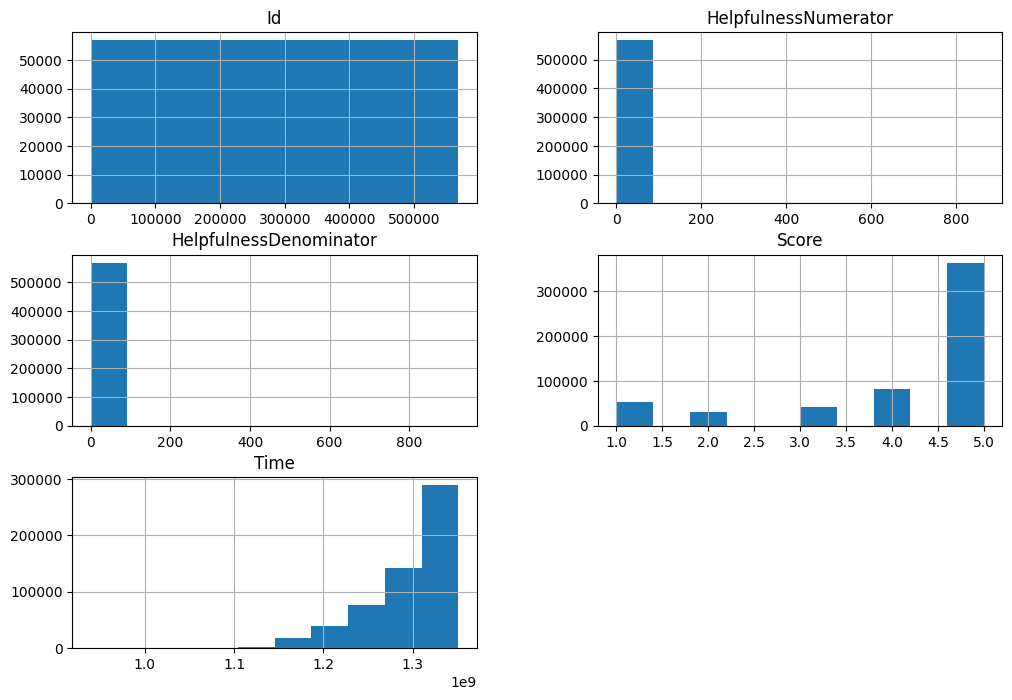

In [16]:
df.hist(figsize=(12,8))
plt.show()


This analysis helps understand:

Distribution shape

Skewness

Frequency patterns

🔹 Categorical Variables

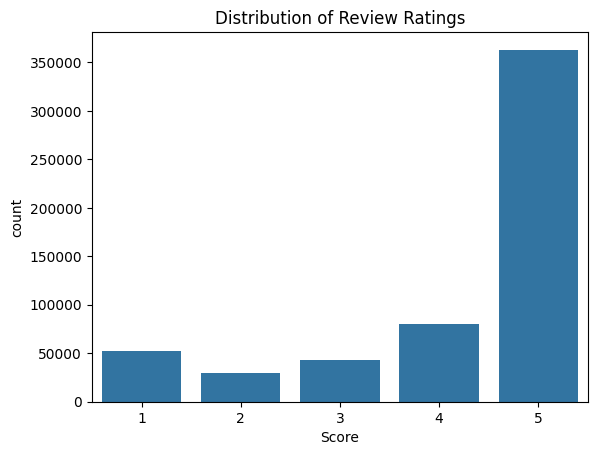

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Score", data=df)
plt.title("Distribution of Review Ratings")
plt.show()


This highlights dominant categories and class imbalance.

7️⃣ Bivariate & Multivariate Analysis
🔹 Correlation Analysis

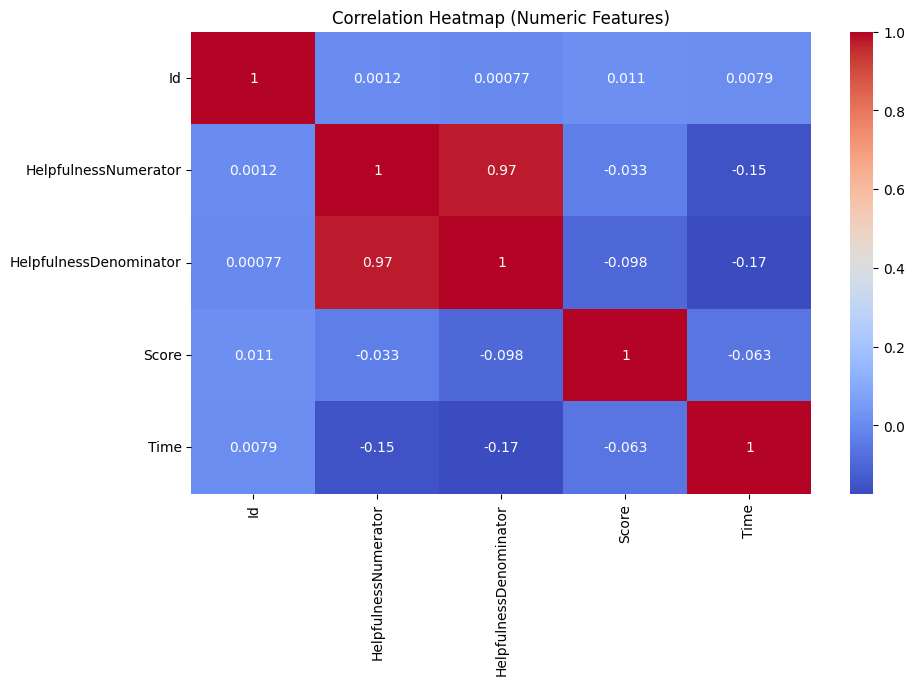

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


Correlation analysis identifies relationships between numerical variables and helps detect multicollinearity.

🔹 Relationship Visualization

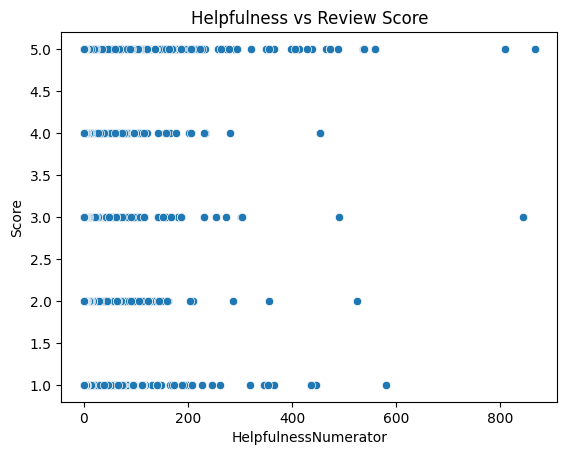

In [23]:
sns.scatterplot(
    x='HelpfulnessNumerator',
    y='Score',
    data=df
)
plt.title('Helpfulness vs Review Score')
plt.show()


Scatter plots help visually assess trends, direction, and strength of relationships.

8️⃣ Outlier Detection

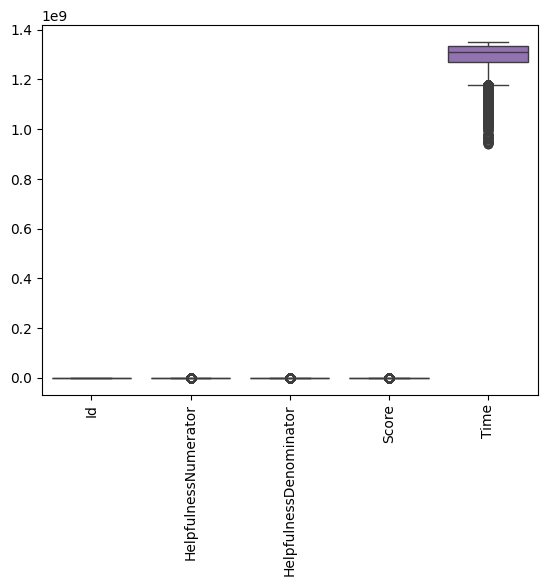

In [24]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Outliers may indicate:

Data entry errors

Rare but valid observations

Significant real-world events

Their impact is evaluated before deciding whether to retain or remove them.

9️⃣ Hypothesis Validation (Exploratory)

Example Hypothesis:
There exists a relationship between Feature A and Feature B.

Validation Approach:

Correlation metrics

Visual inspection using plots

Distribution comparisons

This exploratory validation supports data-driven assumptions.

🔟 Key Insights & Findings
✅ Major Observations:

Certain variables show strong correlations indicating meaningful relationships.

Some features exhibit skewed distributions and outliers.

Missing values are present in specific columns and require handling.

Categorical variables display class imbalance.

The dataset is suitable for further analysis after basic preprocessing.

1️⃣1️⃣ Conclusion

This exploratory data analysis provided a comprehensive understanding of the dataset’s structure, quality, and behavior. Through statistical summaries and visual exploration, important trends, relationships, and anomalies were identified. The findings highlight areas requiring data cleaning and indicate that the dataset is well-suited for further analytical or predictive tasks.